In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats

c:\users\viacheslav_bobrov\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


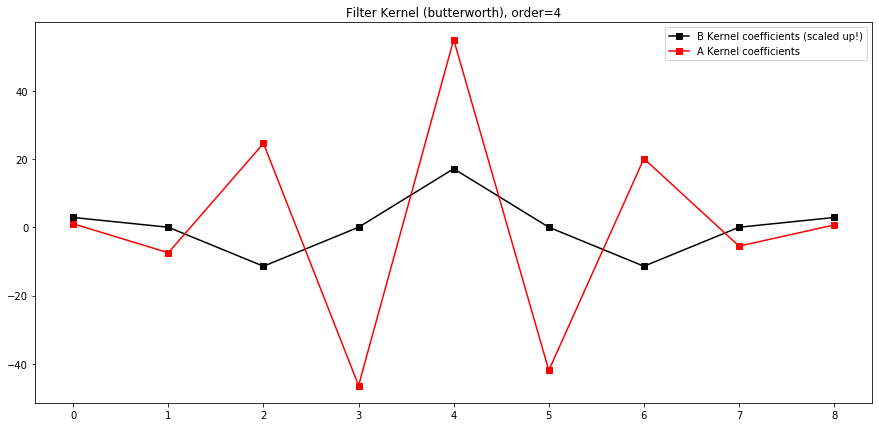

In [17]:
sampling_rate = 1024
nyquist_rate = sampling_rate / 2
filter_range = [20, 45]
order = 4  # very small compared to FIR filters

# type can be low, high
coef_kernel_B, coef_kernel_A = signal.butter(order, np.array(filter_range) / nyquist_rate, btype='bandpass')
filter_power = abs(np.fft.fft(coef_kernel_B)) ** 2
hz_axis = np.linspace(0, nyquist_rate, np.floor(len(coef_kernel_B) / 2) + 1)
filter_power = filter_power[:len(hz_axis)]

# Plotting
plt.figure(figsize=(15, 7))
# B coef are scaled up to 100000, because they have lower amplitude compared to A
plt.plot(coef_kernel_B * 100000, '-ks', label='B Kernel coefficients (scaled up!)')
plt.plot(coef_kernel_A, '-rs', label='A Kernel coefficients')
plt.title('Filter Kernel (butterworth), order={0}'.format(order))
plt.legend()

#
#
# IIR FILTERS ARE NOT CHECKED ON POWER SPECTRUM LIKE FIR, THEY ARE CHECKED ON REAL DATA
#
#


# Evaluation of an IIR filter: filter an impulse

c:\users\viacheslav_bobrov\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


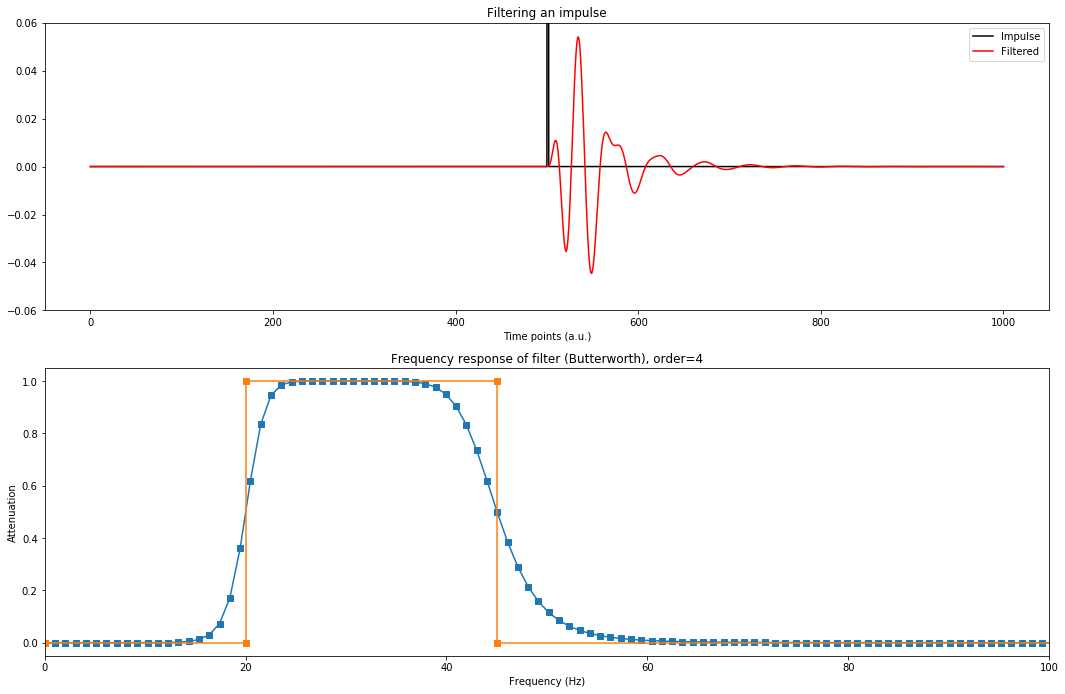

In [25]:
# Evaluation of an IIR filter: filter an impulse

impulse_signal = np.zeros(1001)
impulse_signal[501] = 1

filtered_signal = signal.lfilter(coef_kernel_B, coef_kernel_A, impulse_signal, axis=-1)
signal_power = abs(np.fft.fft(filtered_signal)) ** 2
hz_axis = np.linspace(0, nyquist_rate, np.floor(len(impulse_signal) / 2) + 1)
signal_power = signal_power[:len(hz_axis)]

# plot
plt.figure(figsize=(18, 18))
plt.subplot(311)
plt.plot(impulse_signal, 'k', label='Impulse')
plt.plot(filtered_signal, 'r', label='Filtered')
plt.ylim([-.06, .06])
plt.legend()
plt.xlabel('Time points (a.u.)')
plt.title('Filtering an impulse')

plt.subplot(312)
plt.plot(hz_axis, signal_power, 's-', label='Generated frequency response')
ideal_x_axis = [0, filter_range[0], filter_range[0], filter_range[1], filter_range[1], nyquist_rate]
ideal_y_axis = [0, 0, 1, 1, 0, 0]
plt.plot(ideal_x_axis, ideal_y_axis, 's-', label='Ideal frequency response')
plt.xlim([0, 100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth), order={0}'.format(order))
plt.show()


# Effects of the filter kernel order

c:\users\viacheslav_bobrov\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\users\viacheslav_bobrov\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 1080x504 with 0 Axes>

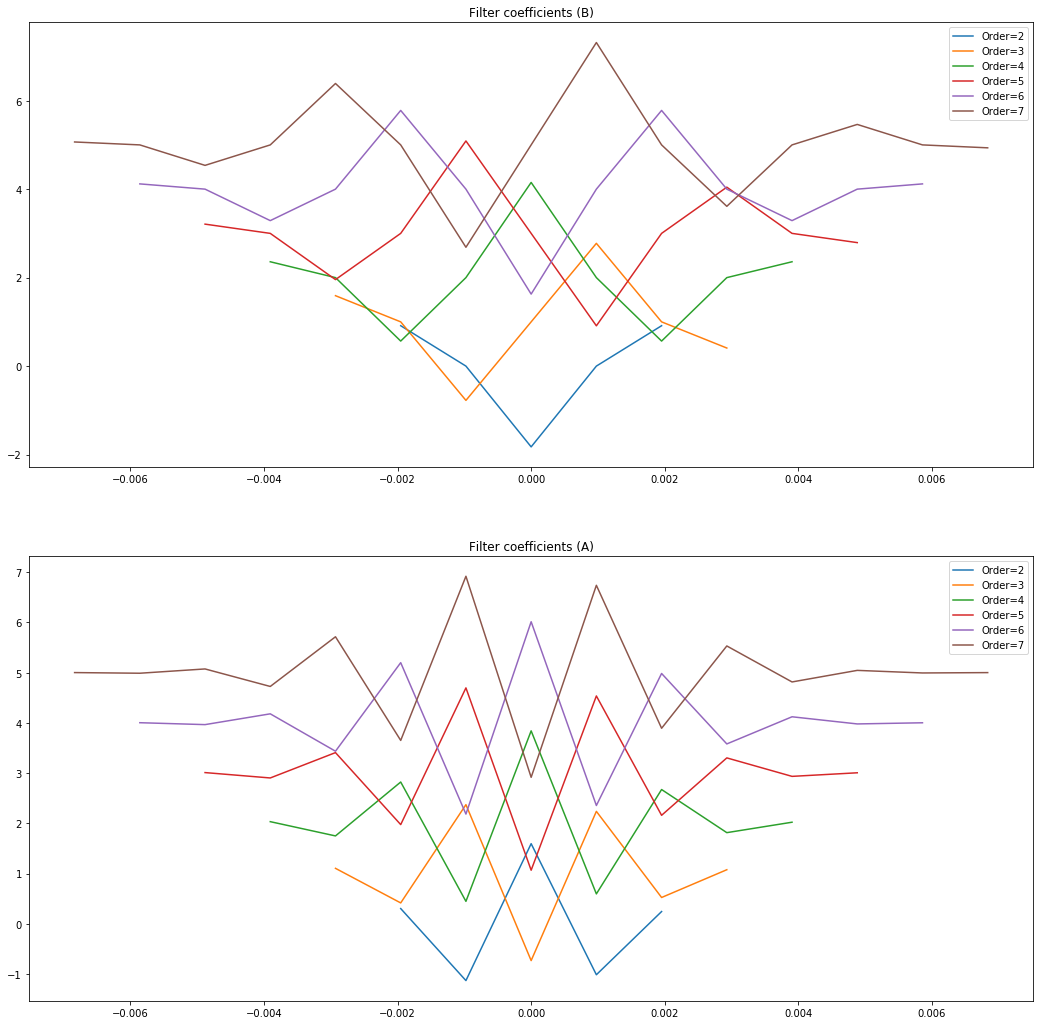

In [51]:
# EFFECTS OF THE FILTER KERNEL ORDER

orders = np.arange(2, 8)

plt.figure(figsize=(15, 7))

filter_powers = np.zeros((len(orders), len(impulse_signal)))
hz_axis = np.linspace(0, sampling_rate, len(impulse_signal))

plt.figure(figsize=(18, 18))
plt.subplot(311)
for i in range(len(orders)):
    coef_kernel_B_i, coef_kernel_A_i = signal.butter(orders[i], np.array(filter_range) / nyquist_rate, btype='bandpass')
    filtered_signal_i = signal.lfilter(coef_kernel_B_i, coef_kernel_A_i, impulse_signal, axis=-1)
    filter_powers[i, :] = abs(np.fft.fft(filtered_signal_i)) ** 2

    time = np.arange(0, len(coef_kernel_B_i)) / sampling_rate
    time = time - np.mean(time)
    plt.subplot(211)
    plt.plot(time, stats.zscore(coef_kernel_B_i) + i, label='Order={0}'.format(orders[i]))
    plt.title('Filter coefficients (B)')
    plt.legend()

    plt.subplot(212)
    plt.plot(time, stats.zscore(coef_kernel_A_i) + i, label='Order={0}'.format(orders[i]))
    plt.title('Filter coefficients (A)')
    plt.legend()



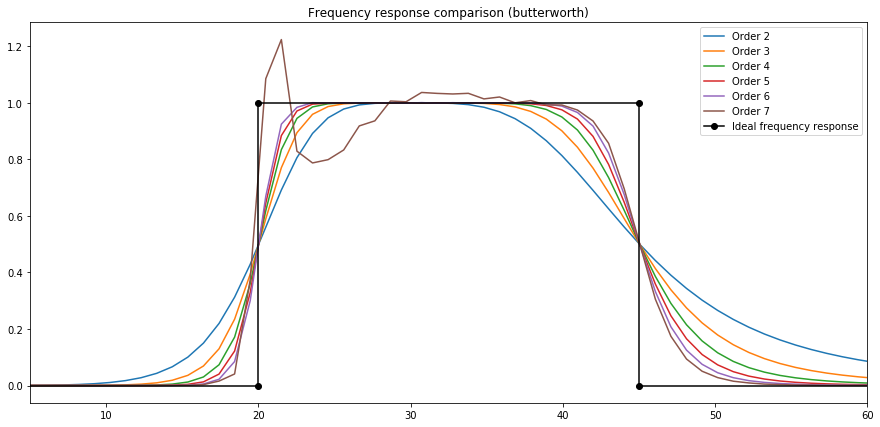

In [55]:
plt.figure(figsize=(15, 7))

for i in range(len(orders)):
    plt.plot(hz_axis, filter_powers[i], label='Order {0}'.format(orders[i]))
plt.plot(ideal_x_axis, ideal_y_axis, 'ko-', label='Ideal frequency response')
plt.xlim([5, 60])
plt.title('Frequency response comparison (butterworth)')
plt.legend()
